#1. Generate synthetic image with random blobs 

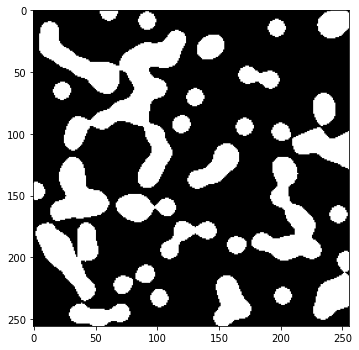

In [1]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

IG = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

# 2. Object segmentation and labeling

- Segmentation of blobs using Otsu's optimal threshold
- Labeling connected regions 
- Visualization



<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


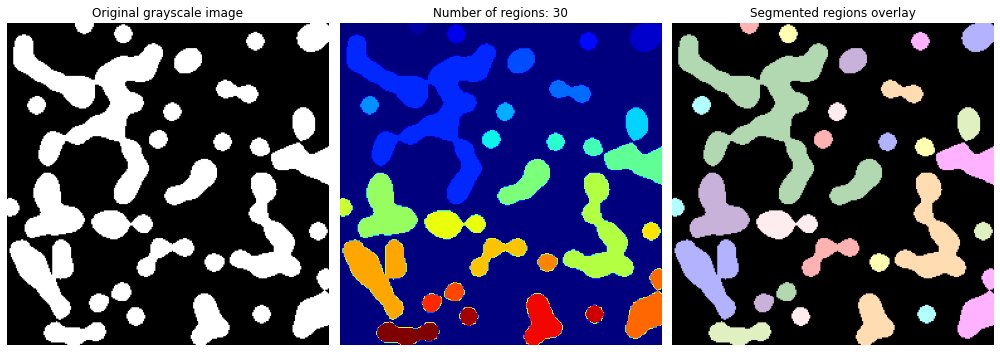

In [2]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# 3. Get regional properties in a pandas dataframe

Function documentation with a list of available attributes can be found at https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table


In [3]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()


,label,area,eccentricity,extent,axis_major_length
0,1,103,0.789059,0.762963,15.028775
1,2,481,0.590196,0.804348,27.612342
2,3,166,0.225298,0.737778,14.737446
3,4,161,0.000000,0.715556,14.335813
4,5,5162,0.624612,0.321320,142.277603


Represent area of the blobs as a function of the major axis length

<AxesSubplot:xlabel='axis_major_length', ylabel='area'>

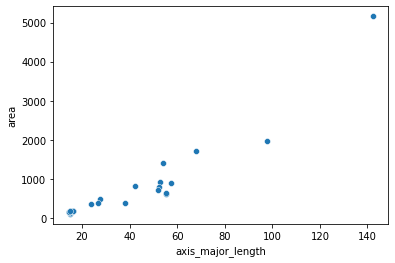

In [4]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

Clear correlation between blob's length and area can be observed 

#4. Analyze blobs


Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance: 

How many blobs have an area above the average?

In [5]:
df_features.loc[df_features['area']>=df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
4,5,5162,0.624612,0.321320,142.277603
13,14,922,0.877789,0.589514,52.922518
14,15,785,0.914351,0.505148,52.179720
15,16,1400,0.628713,0.560897,53.986938
16,17,1961,0.875630,0.409566,97.766659
18,19,717,0.915258,0.636202,51.909728
21,22,1706,0.746981,0.522672,67.870697
23,24,895,0.905219,0.551108,57.239558
26,27,824,0.747798,0.648308,42.331847


In [6]:
mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))

there are 9 blobs with an area larger or equal the mean area 655.3666666666667


Represent the blobs that have an area smaller than the average blob's area

In [7]:
df_small_blobs = df_features.loc[df_features['area']<mean_blobs_area]
N_small = df_small_blobs.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_small,mean_blobs_area))

there are 21 blobs with an area smaller than the mean area 655.3666666666667


find the labels of small and large blobs

In [8]:
labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))


labels of small blobs: [ 1  2  3  4  6  7  8  9 10 11 12 13 18 20 21 23 25 26 28 29 30]
labels of large blobs: [ 5 14 15 16 17 19 22 24 27]


Create a binary mask with the large and small blobs

In [ ]:
import numpy as np
mask_small_blobs = np.isin(label_image,labels_small)
mask_large_blobs = np.isin(label_image,labels_large)

Represent the large and small blobs

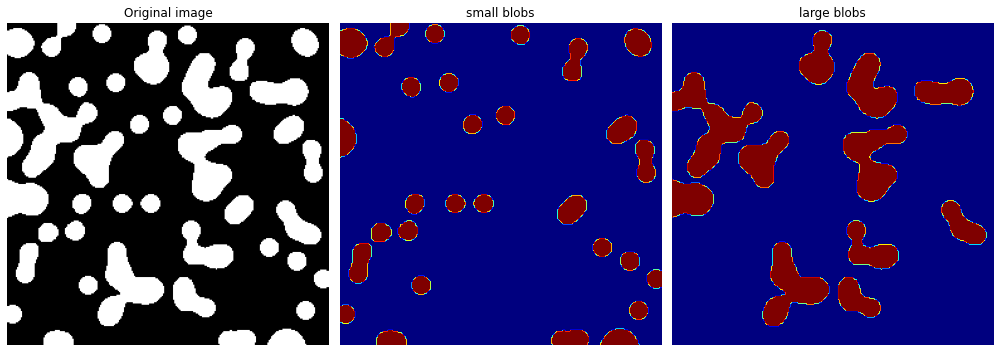

In [ ]:
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original image') 
ax[1].imshow(mask_small_blobs,cmap=plt.cm.jet)
ax[1].set_title('small blobs') # set figure title
ax[2].imshow(mask_large_blobs,cmap=plt.cm.jet)
ax[2].set_title('large blobs') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()